In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
#Impoting SF Data, create monthly graphs
sf_df = pd.read_csv("sf_merged_data.csv", parse_dates = ["starttime", "stoptime"])
del sf_df["Unnamed: 0"]

print(sf_df.shape)
sf_df["Date (YearMonth)"] = sf_df['starttime'].dt.strftime('%Y%m')
sf_df["Date"] = sf_df['starttime'].dt.strftime('%Y%m%d')
sf_df["Month"] = sf_df['starttime'].dt.strftime('%m').astype(int)
sf_df["Year"] = sf_df['starttime'].dt.strftime('%Y').astype(int)

#SF Only
sf_df["Precipitation_modified"] = sf_df['Pecipitation'].replace(to_replace = "T", value = np.nan).astype(float)

sf_df.head()

/Users/yannielee/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(669959, 15)


,tripduration,starttime,start station name,start station id,stoptime,end station name,end station id,bikeid,usertype,city,weather key,max temp,min temp,avg wind,Pecipitation,Date (YearMonth),Date,Month,Year,Precipitation_modified
0,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308,20130829,8,2013,0.0
1,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308,20130829,8,2013,0.0
2,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,Mountain View,2013082994041,80.0,64.0,5.0,0,201308,20130829,8,2013,0.0
3,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308,20130829,8,2013,0.0
4,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308,20130829,8,2013,0.0


In [ ]:
#sf_sfonly = sf_df["city" == "San Francisco"]
#sf_notsf = sf_df["city" != "San Francisco"]


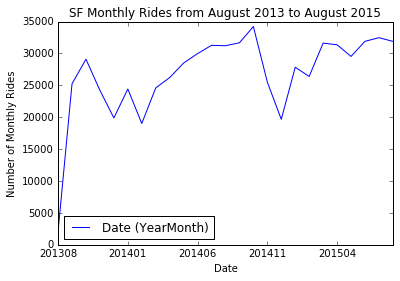

In [4]:
#Overview
sf_df.groupby(['Date (YearMonth)']).agg({'Date (YearMonth)': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Rides")
plt.title("SF Monthly Rides from August 2013 to August 2015")
plt.savefig('SF_Rides Per Month Summary.png')


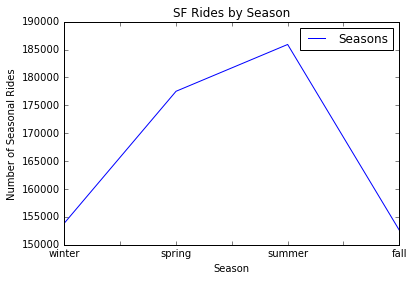

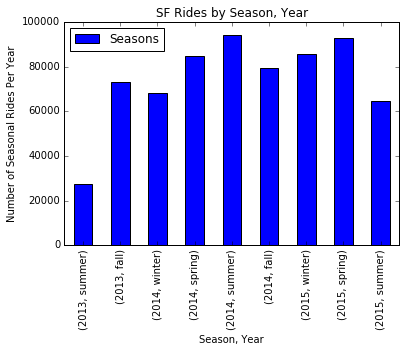

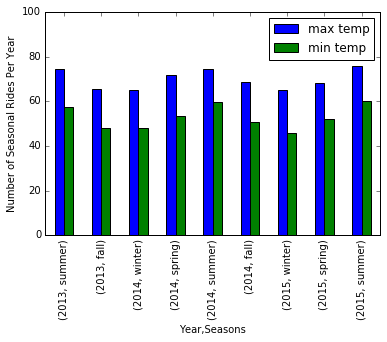

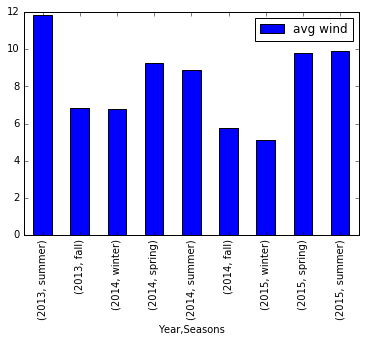

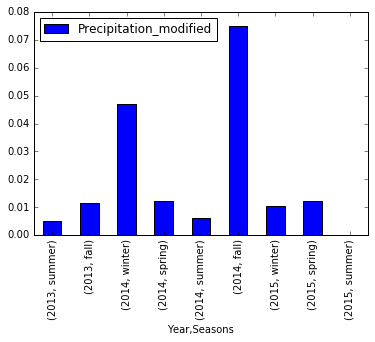

In [62]:
#How do seasons affect ridership? 
ranges = [0,3,6,9,12]
labels = ['winter','spring','summer','fall']
sf_df['Seasons'] = pd.cut(sf_df["Month"], ranges, labels=labels).astype('category')
sf_df.groupby(['Seasons']).agg({'Seasons': np.count_nonzero}).plot()
plt.xlabel("Season")
plt.ylabel("Number of Seasonal Rides")
plt.title("SF Rides by Season")
plt.savefig('SF_Seasonal_Rides.png')

#Number of rides per season
sf_df.groupby(['Year','Seasons']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
plt.xlabel("Season, Year")
plt.ylabel("Number of Seasonal Rides Per Year")
plt.title("SF Rides by Season, Year")
plt.savefig('SF_Year_Seasonal_Rides.png')

#Average Temps
sf_df.groupby(['Year','Seasons']).agg({'max temp': np.mean, 'min temp': np.mean}).plot(kind='bar')
plt.ylabel("Number of Seasonal Rides Per Year")
#plt.axis((0,x2,25,250))
plt.gca().set_ylim([0,100])

#Precipitation
sf_df.groupby(['Year','Seasons']).agg({'avg wind' : np.mean}).plot(kind='bar')

#Precipitation
sf_df.groupby(['Year','Seasons']).agg({'Precipitation_modified' : np.mean}).plot(kind='bar')



(array([ 709.,   12.,    7.,    3.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.        ,  0.31071963,  0.62143925,  0.93215888,  1.2428785 ,
         1.55359813,  1.86431776,  2.17503738,  2.48575701,  2.79647664,
         3.10719626]),
 <a list of 10 Patch objects>)

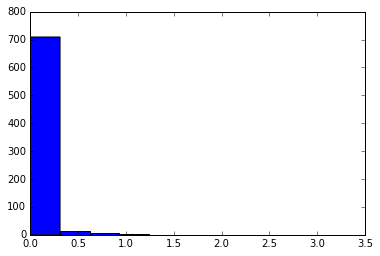

In [74]:
#Understanding weather distribution
#sf_df.groupby(['Date']).agg({'max temp':[np.count_nonzero, np.mean, np.std], 'min temp': [np.count_nonzero, np.mean, np.std]})

sf_precip = sf_df.groupby(['Date']).agg({'Precipitation_modified':[np.mean, np.std]})
plt.hist(sf_precip["Precipitation_modified"]["mean"])

,count_nonzero,rides per day
Precipitation,,
"(-0.1, 0]",3141,175.781917
"(0, 0.5]",234,187.162393
"(0.5, 1]",31,244.548387
"(1, 1.5]",10,190.100000
"(1.5, 2]",2,14.000000


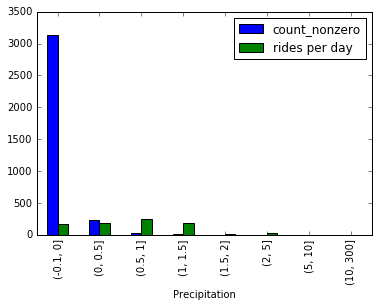

In [129]:
sf_precip = sf_df.groupby(['Date',"city"]).agg({'Precipitation_modified':[np.mean], 'Seasons':[np.count_nonzero]})
sf_precip.columns = sf_precip.columns.droplevel(0)
ranges = [-0.1,0,0.5,1,1.5,2,5,10,300]
sf_precip['Precipitation'] = pd.cut(sf_precip["mean"], ranges).astype('category')
sf_precip = sf_precip.groupby(['Precipitation']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
sf_precip.columns = sf_precip.columns.droplevel(0)
sf_precip["rides per day"] = sf_precip["sum"] / sf_precip["count_nonzero"]
del sf_precip["sum"]
sf_precip["count_nonzero"]
sf_precip.plot(kind='bar')
sf_precip.head()
#

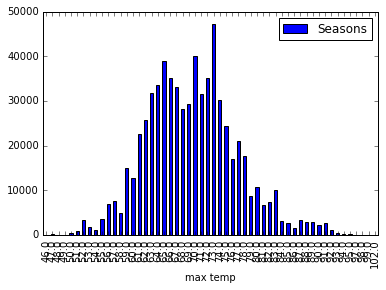

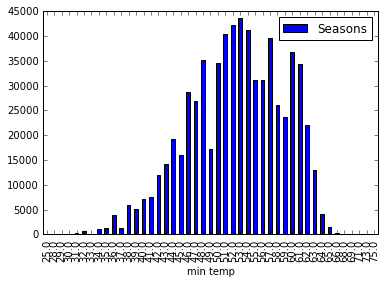

In [14]:
#How does temperature affect ridership? 
#How do seasons affect ridership?  max temp	min temp
#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
sf_df.groupby(['max temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
sf_df.groupby(['min temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')

(0, 10)

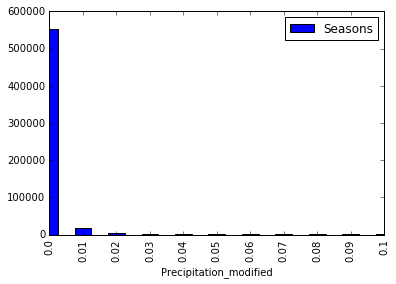

In [59]:
#How does precipitation affect ridership? Pecipitation
#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
sf_df.groupby(['Precipitation_modified']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
plt.gca().set_xlim([0,10])
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')
#Precipitation = np.unique(sf_df['Precipitation_modified'])
#print(Precipitation)

In [ ]:
#How do extreme weather events affect ridership? 


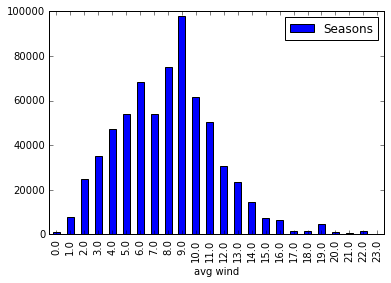

In [17]:
#How does wind affect ridership? avg wind

#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
sf_df.groupby(['avg wind']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')